In [1]:
IJulia.

LoadError: syntax: incomplete: premature end of input

The governing equation of Blasius boundary layer is
$$
    f^{'''} + ff^{'} = 0
$$
with boundary conditions 
\begin{align*}
 f = f^{'} = 0 &\text{ at } \eta = 0 \\
 f^{'} \to 1   &\text{ as } \eta \to \infty
\end{align*}
$f^{''}$ at $\eta = 0$ can be found by using linear transformation $\eta = kz$ where $k$ is a constant. Now $f(\eta) = g(z)/k$ because
\begin{equation}
\frac{\text{d}^nf}{\text{d}\eta^n} = \frac{1}{k^{n+1}}\frac{\text{d}^ng}{\text{d}z^n} \text{ for } n \geq 1.
\end{equation}
Now we can rewrite the problem as 
\begin{equation*}
    g^{'''} + \frac{1}{2}gg^{'} = 0
\end{equation*}
with boundary conditions
\begin{align*}
    g = g^{'} = 0 &\text{ at } z=0 \\
    g^{'} \to k^2 &\text{ as } z \to \infty.
\end{align*}
We are free to choose the magnitude of $g^{''}$ because $k$ is an arbitrary constant. Let's choose so that $g^{''} = 1$ at $z=0$.
Note that $f^{''} = k^{-3}$ at $\eta = 0$. Now we can integrate the rewritten problem and take the last value of $\sqrt{g^{'}}$ as the value of $k$ and integrate the original problem with boundary condition $f^{''}=k^{-3}$.


Reference: Sedat Birigen, Chuen-Yen Chow *An introduction to computational fluid mechanics by example*, JOHN WILEY & SONS, INC, 2011.

Value for k is 1.4440939563551187

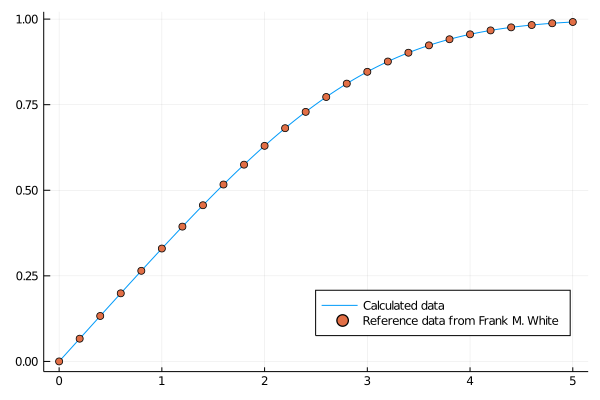

In [9]:
#import Pkg

#Pkg.add("OrdinaryDiffEq")
#Pkg.add("Plots")

using OrdinaryDiffEq,Plots


function Blasius(du,u,p,z)
    g = u[1]
    du[1] = u[2]
    du[2] = u[3]
    du[3] = -1/2*g*du[2]    
end
u0 =  [0.0,0.0,1.0]
zspan = (0.0,10.0)
prob = ODEProblem(Blasius,u0,zspan)
sol = solve(prob,RK4(),saveat = 0.01)
k = sqrt(sol[2,end])
u0 =  [0.0,0.0,(k)^(-3)]
yspan = (0.0,5)
prob = ODEProblem(Blasius,u0,yspan)
sol = solve(prob,RK4(),saveat = 0.01)
print("Value for k is $k")
y_plot = range(yspan[1],stop=yspan[end],length=length(sol[2,:]))
plot(y_plot,sol[2,:],label="Calculated data")
test_data = [
    0.0 0.0;
    0.2 0.06641;
    0.4 0.13277;
    0.6 0.19894;
    0.8 0.26471;
    1.0 0.32979;
    1.2 0.39378;
    1.4 0.45627;
    1.6 0.51676;
    1.8 0.57477;
    2.0 0.62977;
    2.2 0.68132;
    2.4 0.72899;
    2.6 0.77246;
    2.8 0.81152;
    3.0 0.84605;
    3.2 0.87609;
    3.4 0.90177; 
    3.6 0.92333;
    3.8 0.94112;
    4.0 0.95552;
    4.2 0.96696;
    4.4 0.97587;
    4.6 0.98269;
    4.8 0.98779;
    5.0 0.99155;
]
# From the book Fluid Mechanics by Frank M. White
scatter!(test_data[:,1],test_data[:,2],label="Reference data from Frank M. White",legend=:bottomright)

